# Introduction


<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!


### Install Package with Country Codes


In [1]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.


In [2]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements


In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation


In [4]:
pd.options.display.float_format = "{:,.2f}".format

### Load the Data


In [5]:
df_data = pd.read_csv("mission_launches_Feb2024.csv")

# Preliminary Data Exploration

- What is the shape of `df_data`?
- How many rows and columns does it have?
- What are the column names?
- Are there any NaN values or duplicates?


In [6]:
print(df_data.shape)
df_data.tail()

(6711, 8)


,Unnamed: 0,Organisation,Location,Datetime,Details,Status,Price,Mission_status
6706,706,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,Retired,NaN,Failure
6707,707,ABMA,"LC-26A, Cape Canaveral SFS, Florida, USA","Sat Feb 01, 1958 03:47 UTC",Juno I | Explorer 1,Retired,NaN,Success
6708,708,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,Retired,NaN,Failure
6709,709,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik 2,Retired,NaN,Success
6710,710,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik 1,Retired,NaN,Success


In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6711 entries, 0 to 6710
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      6711 non-null   int64  
 1   Organisation    6711 non-null   object 
 2   Location        6711 non-null   object 
 3   Datetime        6711 non-null   object 
 4   Details         6711 non-null   object 
 5   Status          6711 non-null   object 
 6   Price           2637 non-null   float64
 7   Mission_status  6711 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 419.6+ KB


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.


In [8]:
df_data.drop(columns=["Unnamed: 0"], inplace=True)

In [9]:
df_data.head()

,Organisation,Location,Datetime,Details,Status,Price,Mission_status
0,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri Feb 09, 2024 07:03 UTC",Soyuz 2.1v | Cosmos 2575,Active,NaN,Success
1,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA","Thu Feb 08, 2024 06:33 UTC",Falcon 9 Block 5 | PACE,Active,67.00,Success
2,CASC,"Bo Run Jiu Zhou Barge (Area 2), China Coastal ...","Sat Feb 03, 2024 03:06 UTC",Jielong-3 | 9 satellites,Active,NaN,Success
3,CASC,"LC-3, Xichang Satellite Launch Center, China","Fri Feb 02, 2024 23:37 UTC",Long March 2C | Geely Constellation Group 02,Active,30.80,Success
4,Rocket Lab,"Rocket Lab LC-1B, Māhia Peninsula, New Zealand","Wed Jan 31, 2024 06:34 UTC",Electron/Curie | Four Of A Kind,Active,7.50,Success


## Descriptive Statistics


In [10]:
df_data.describe()

,Price
count,"2,637.00"
mean,69.16
std,101.44
min,2.50
25%,20.00
50%,30.00
75%,67.00
max,876.00


In [11]:
df_data.Location.describe()

count                                          6711
unique                                          166
top       Site 1/5, Baikonur Cosmodrome, Kazakhstan
freq                                            487
Name: Location, dtype: object

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.


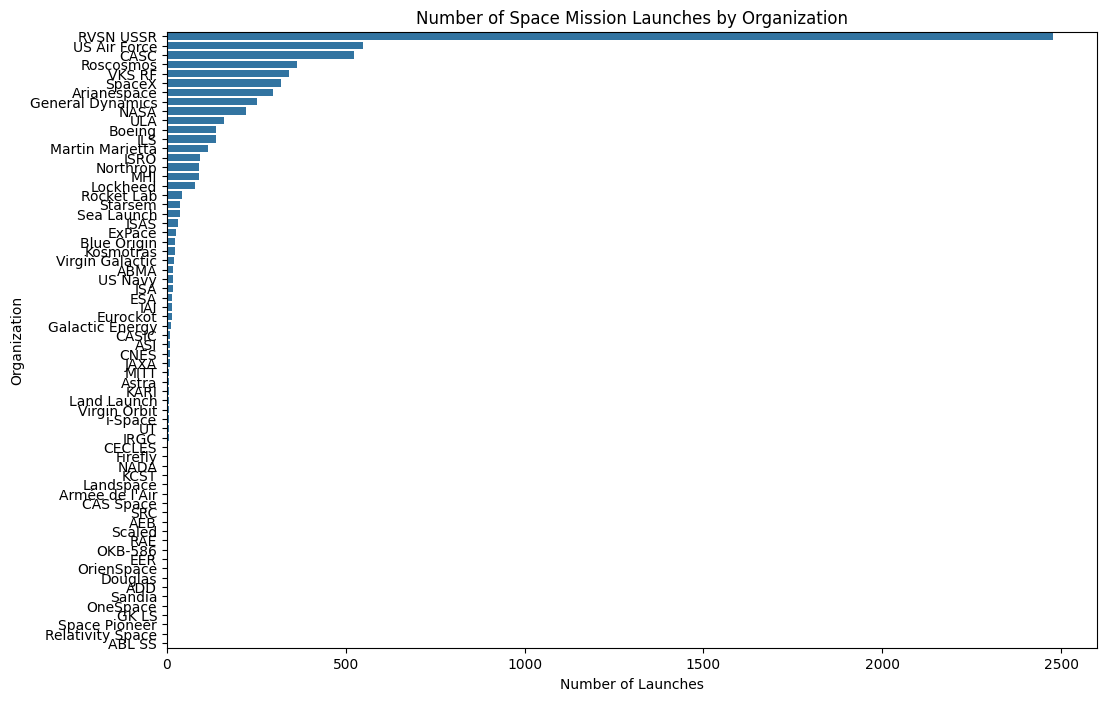

In [12]:
plt.figure(figsize=(12, 8))
sns.countplot(
    y="Organisation", data=df_data, order=df_data["Organisation"].value_counts().index
)
plt.title("Number of Space Mission Launches by Organization")
plt.xlabel("Number of Launches")
plt.ylabel("Organization")
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?


In [13]:
avr = df_data.sort_values(by="Status", ascending=False).value_counts("Status")

In [14]:
avr

Status
Retired    5240
Active     1471
Name: count, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?


In [15]:
successful_missions = df_data["Mission_status"].value_counts().get("Success", 0)
print(f"Number of successful missions: {successful_missions}")

Number of successful missions: 6134


In [16]:
failed_missions = df_data["Mission_status"].value_counts().get("Failure", 0)
print(f"Number of failed missions: {failed_missions}")

Number of failed missions: 455


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).


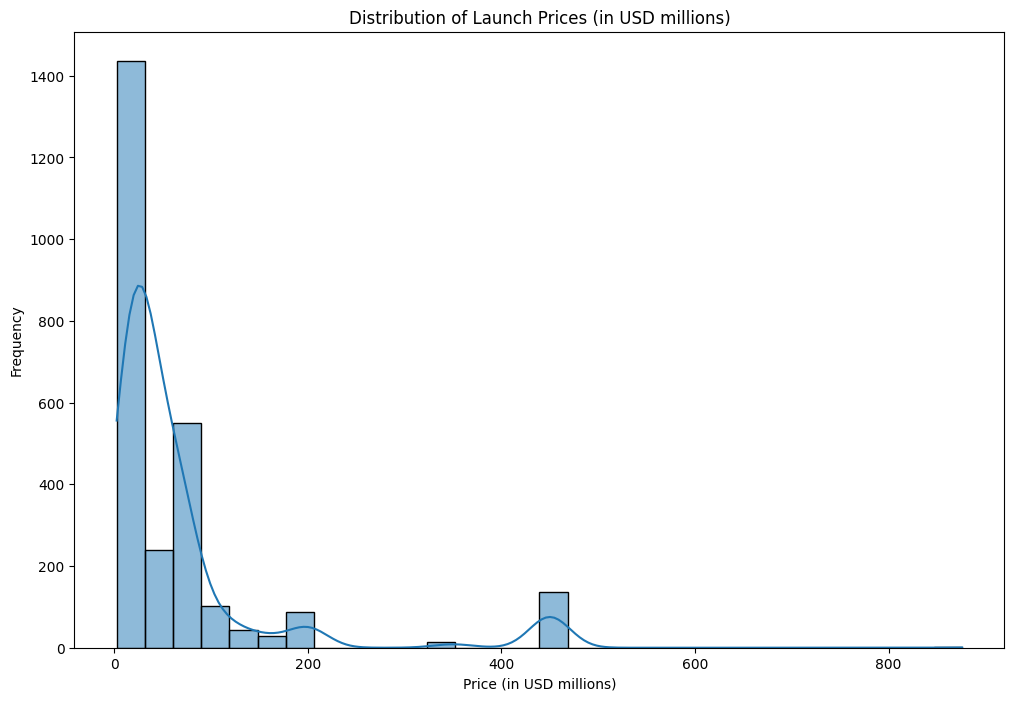

In [17]:
plt.figure(figsize=(12, 8))
sns.histplot(df_data["Price"].dropna(), bins=30, kde=True)
plt.title("Distribution of Launch Prices (in USD millions)")
plt.xlabel("Price (in USD millions)")
plt.ylabel(ylabel="Frequency")
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

- Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
- Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
- You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

- Russia is the Russian Federation
- New Mexico should be USA
- Yellow Sea refers to China
- Shahrud Missile Test Site should be Iran
- Pacific Missile Range Facility should be USA
- Barents Sea should be Russian Federation
- Gran Canaria should be USA

You can use the iso3166 package to convert the country names to Alpha3 format.


In [18]:
# Seperate the country from the location and create a new column.
df_data["launch_country"] = df_data["Location"].str.split(", ").str[-1]

# Replace bad data i.e outdated country names.
df_data["launch_country"] = df_data["launch_country"].replace(
    {
        "Gran Canaria": "USA",
        "Yellow Sea": "China",
        "China Coastal Waters": "China",
        "Pacific Missile Range Facility": "USA",
        "Barents Sea": "Russian Federation",
        "Russia": "Russian Federation",
        "Pacific Ocean": "USA",
        "Marshall Islands": "USA",
        "Iran": "Iran, Islamic Republic of",
        "North Korea": "Korea, Democratic People's Republic of",
        "South Korea": "Korea, Republic of",
        "United Kingdom": "United Kingdom of Great Britain and Northern Ireland",
    }
)

# Use iso3166 to get alpha3 codes
df_data["launch_country_code"] = df_data["launch_country"].apply(
    lambda x: (countries.get(x).alpha3)
)

# Use groupby to get the total launches by country and country code.
df_launches = df_data.groupby(
    ["launch_country", "launch_country_code"], as_index=False
).agg({"Mission_status": pd.Series.count})
df_launches.rename(columns={"Mission_status": "Total_launches"}, inplace=True)

# Check the table.
df_launches.sort_values(by="Total_launches", ascending=False)

,launch_country,launch_country_code,Total_launches
14,USA,USA,2101
13,Russian Federation,RUS,1816
8,Kazakhstan,KAZ,1553
2,China,CHN,584
3,France,FRA,324
7,Japan,JPN,132
4,India,IND,92
12,New Zealand,NZL,40
5,"Iran, Islamic Republic of",IRN,21
6,Israel,ISR,14


In [19]:
# Deploy the map
px.choropleth(
    data_frame=df_launches,
    locations="launch_country_code",
    color="Total_launches",
    color_continuous_scale="matter",
)

# Use a Choropleth Map to Show the Number of Failures by Country


In [24]:
# Filter the dataframe to include only failed missions
df_failures = df_data[df_data["Mission_status"] == "Failure"]

# Group by country and count the number of failures
df_failures = df_failures.groupby(
    ["launch_country", "launch_country_code"], as_index=False
).agg({"Mission_status": pd.Series.count})
df_failures.rename(columns={"Mission_status": "Number of Failures"}, inplace=True)

df_failures.sort_values(by="Number of Failures", ascending=False)

,launch_country,launch_country_code,Number of Failures
13,USA,USA,172
8,Kazakhstan,KAZ,113
12,Russian Federation,RUS,72
2,China,CHN,28
3,France,FRA,15
7,Japan,JPN,13
4,India,IND,10
5,"Iran, Islamic Republic of",IRN,9
9,"Korea, Democratic People's Republic of",PRK,5
0,Australia,AUS,4


In [23]:
# Deploy the map for mission failures
fig = px.choropleth(
    data_frame=df_failures,
    locations="launch_country_code",
    color="Number of Failures",
    color_continuous_scale="matter",
    labels={"Number of Failures": "Number of Failures"},
    title="Number of Mission Failures by Country",
)

fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.


In [25]:
df_data.head()

,Organisation,Location,Datetime,Details,Status,Price,Mission_status,launch_country,launch_country_code
0,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri Feb 09, 2024 07:03 UTC",Soyuz 2.1v | Cosmos 2575,Active,NaN,Success,Russian Federation,RUS
1,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA","Thu Feb 08, 2024 06:33 UTC",Falcon 9 Block 5 | PACE,Active,67.00,Success,USA,USA
2,CASC,"Bo Run Jiu Zhou Barge (Area 2), China Coastal ...","Sat Feb 03, 2024 03:06 UTC",Jielong-3 | 9 satellites,Active,NaN,Success,China,CHN
3,CASC,"LC-3, Xichang Satellite Launch Center, China","Fri Feb 02, 2024 23:37 UTC",Long March 2C | Geely Constellation Group 02,Active,30.80,Success,China,CHN
4,Rocket Lab,"Rocket Lab LC-1B, Māhia Peninsula, New Zealand","Wed Jan 31, 2024 06:34 UTC",Electron/Curie | Four Of A Kind,Active,7.50,Success,New Zealand,NZL


In [27]:
fig = px.sunburst(df_data, path=["launch_country", "Organisation", "Mission_status"])
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions


In [31]:
# Group by Organisation and sum the Price column
total_spent_by_org = df_data.groupby("Organisation")["Price"].sum().reset_index()

# Sort the values by the total amount spent in descending order
total_spent_by_org = total_spent_by_org.sort_values(by="Price", ascending=False)

# Display the result
total_spent_by_org.head(10)

,Organisation,Price
41,NASA,"62,076.00"
56,SpaceX,"20,427.00"
5,Arianespace,"18,920.00"
58,ULA,"17,883.00"
11,CASC,"15,740.78"
47,RVSN USSR,"14,200.00"
50,Roscosmos,"6,614.70"
25,ILS,"5,610.00"
42,Northrop,"4,520.00"
37,MHI,"4,032.50"


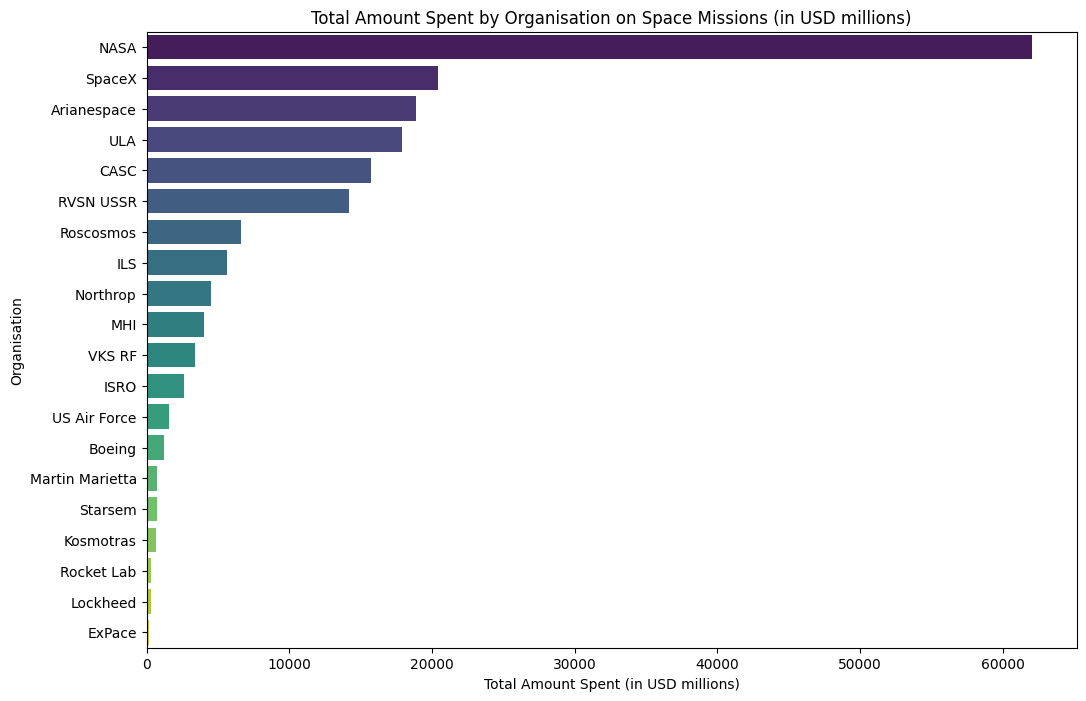

In [36]:
# Create a bar chart for the total amount spent by organisation
plt.figure(figsize=(12, 8))
sns.barplot(
    x="Price",
    y="Organisation",
    data=total_spent_by_org.head(20),
    hue="Organisation",
    palette="viridis",
    legend=False,
)
plt.title("Total Amount Spent by Organisation on Space Missions (in USD millions)")
plt.xlabel("Total Amount Spent (in USD millions)")
plt.ylabel("Organisation")
plt.show()

# Analyse the Amount of Money Spent by Organisation per Launch


In [38]:
# Calculate the average price per launch for each organization
avg_spent_per_launch = df_data.groupby("Organisation")["Price"].mean().reset_index()

# Sort the values by the average amount spent per launch in descending order
avg_spent_per_launch = avg_spent_per_launch.sort_values(by="Price", ascending=False)

# Display the result
avg_spent_per_launch.head(15)

,Organisation,Price
41,NASA,453.11
9,Boeing,177.29
58,ULA,155.50
5,Arianespace,141.19
37,MHI,93.78
39,Martin Marietta,80.16
25,ILS,71.01
56,SpaceX,65.68
59,US Air Force,59.65
42,Northrop,49.67


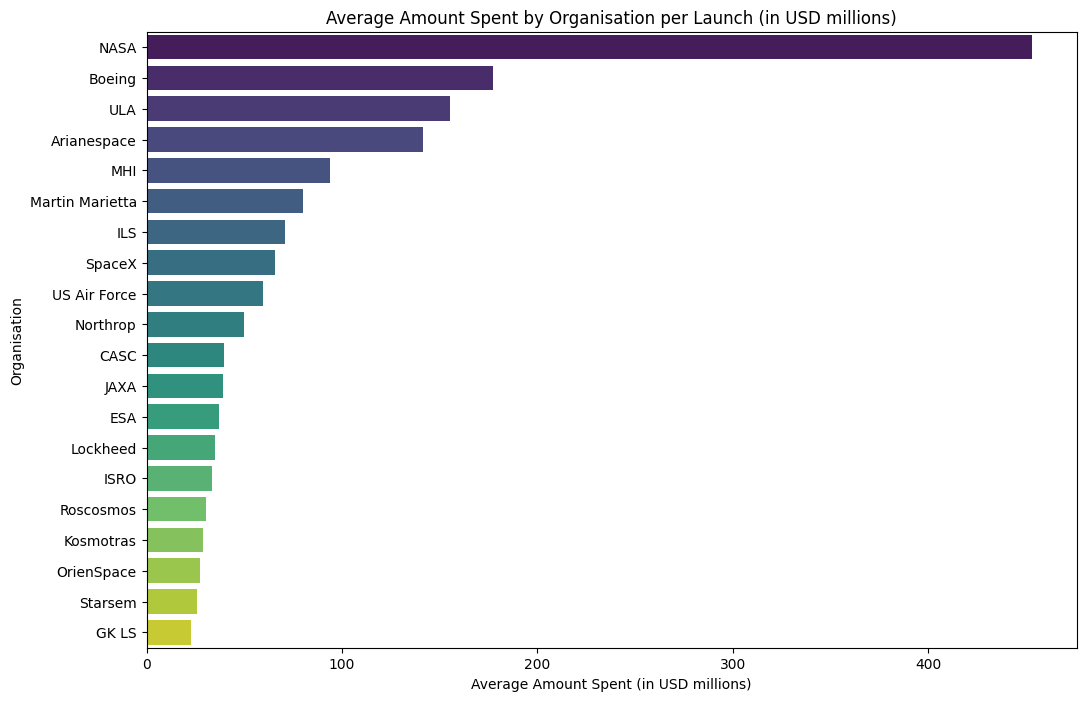

In [39]:
# Create a bar chart for the average amount spent per launch by organization
plt.figure(figsize=(12, 8))
sns.barplot(
    x="Price",
    y="Organisation",
    data=avg_spent_per_launch.head(20),
    hue="Organisation",
    palette="viridis",
    legend=False,
)
plt.title("Average Amount Spent by Organisation per Launch (in USD millions)")
plt.xlabel("Average Amount Spent (in USD millions)")
plt.ylabel("Organisation")
plt.show()

# Chart the Number of Launches per Year


In [50]:
# Convert the 'Datetime' column to datetime format
df_data["Datetime"] = pd.to_datetime(df_data["Datetime"], utc=True)

# Extract the year from the 'Datetime' column and create a new column 'Year'
df_data["Year"] = df_data["Datetime"].dt.year

# Group by 'Year' and count the number of launches
launches_per_year = (
    df_data.groupby("Year").size().reset_index(name="Number of Launches")
)
launches_per_year.sample(10)

,Year,Number of Launches
54,2011,84
61,2018,120
50,2007,68
55,2012,78
24,1981,126
33,1990,122
11,1968,131
17,1974,114
64,2021,157
43,2000,85


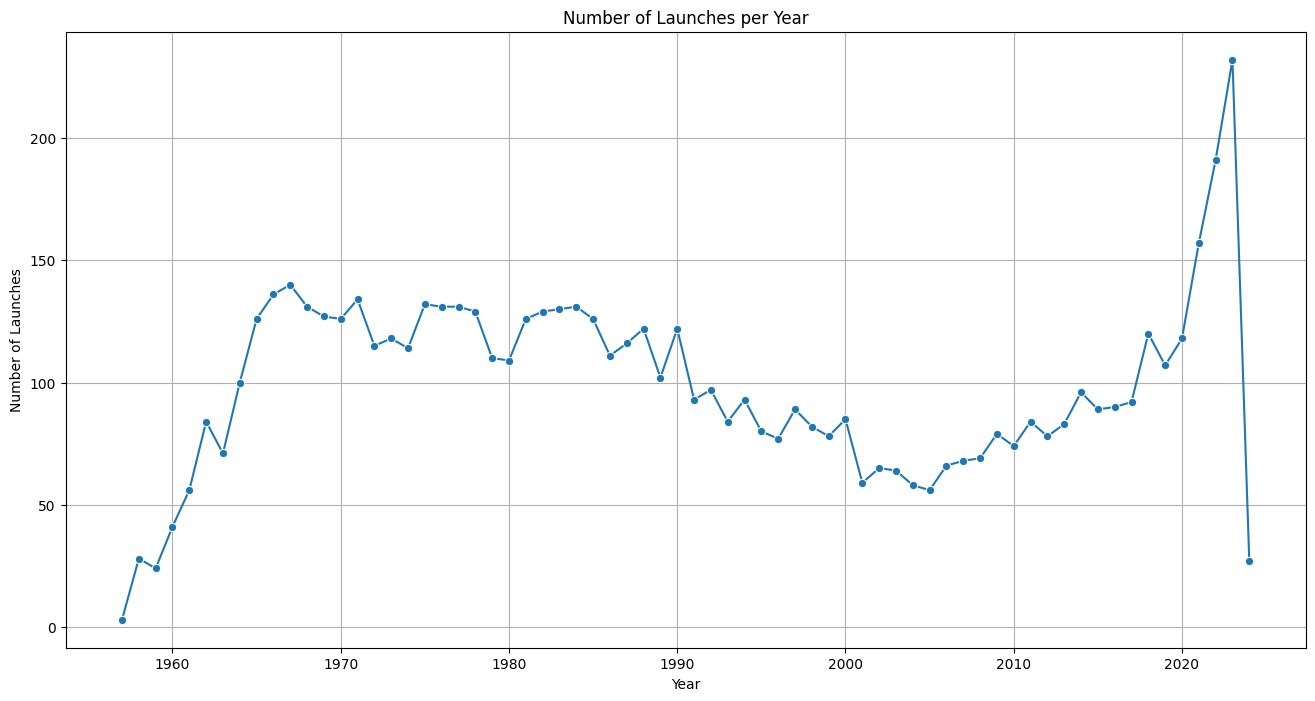

In [52]:
# Plot the number of launches per year
plt.figure(figsize=(16, 8))
sns.lineplot(data=launches_per_year, x="Year", y="Number of Launches", marker="o")
plt.title("Number of Launches per Year")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.grid(True)
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.


In [53]:
# Extract the month and year from the 'Datetime' column and create a new column 'YearMonth'
df_data["YearMonth"] = df_data["Datetime"].dt.to_period("M")

# Group by 'YearMonth' and count the number of launches
launches_per_month = (
    df_data.groupby("YearMonth").size().reset_index(name="Number of Launches")
)

# Convert 'YearMonth' back to datetime for plotting
launches_per_month["YearMonth"] = launches_per_month["YearMonth"].dt.to_timestamp()

# Calculate the rolling average (e.g., 12-month rolling average)
launches_per_month["Rolling Average"] = (
    launches_per_month["Number of Launches"].rolling(window=12).mean()
)

/var/folders/3q/zg5b2vcj50nc6cwf_t1v64wm0000gn/T/ipykernel_71994/1310066555.py:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



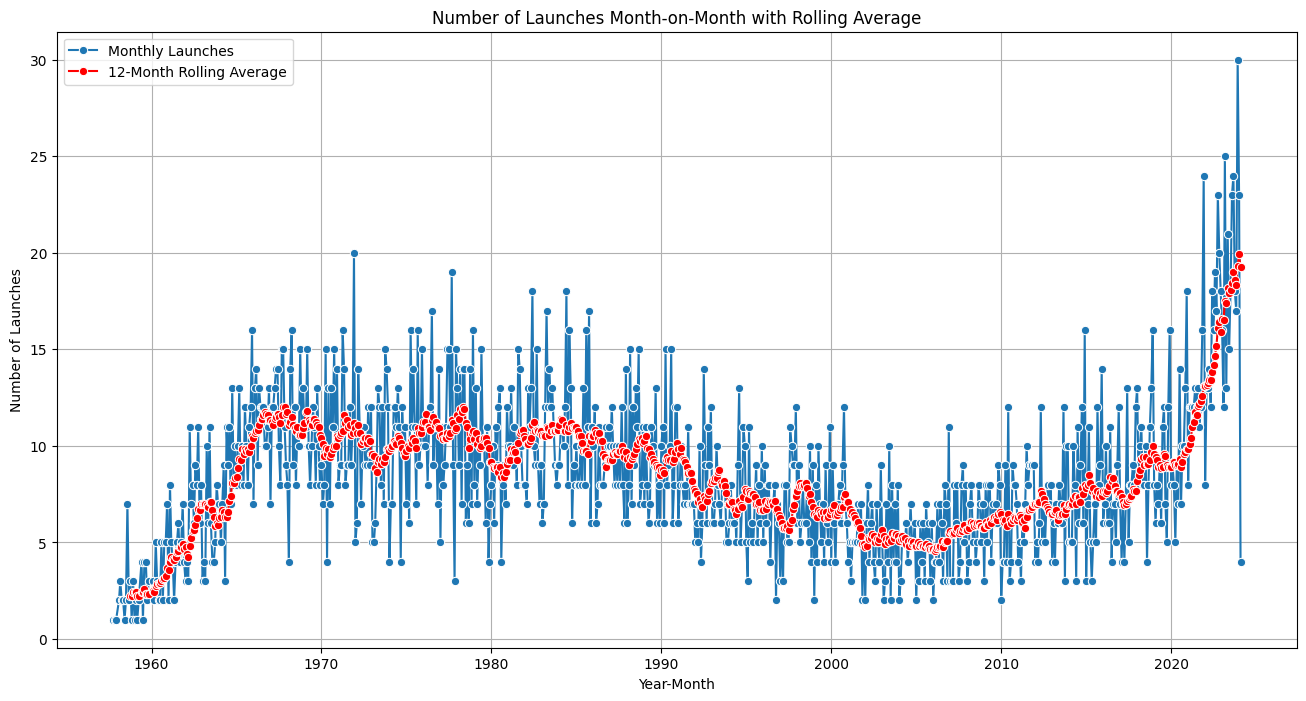

The month with the highest number of launches is 2023-12 with 30 launches.


In [54]:
# Plot the number of launches per month with a rolling average
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=launches_per_month,
    x="YearMonth",
    y="Number of Launches",
    marker="o",
    label="Monthly Launches",
)
sns.lineplot(
    data=launches_per_month,
    x="YearMonth",
    y="Rolling Average",
    marker="o",
    label="12-Month Rolling Average",
    color="red",
)
plt.title("Number of Launches Month-on-Month with Rolling Average")
plt.xlabel("Year-Month")
plt.ylabel("Number of Launches")
plt.legend()
plt.grid(True)
plt.show()

# Find the month with the highest number of launches
max_launches_month = launches_per_month.loc[
    launches_per_month["Number of Launches"].idxmax()
]
print(
    f"The month with the highest number of launches is {max_launches_month['YearMonth'].strftime('%Y-%m')} with {max_launches_month['Number of Launches']} launches."
)

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?


In [57]:
launches_per_month.describe()

,YearMonth,Number of Launches,Rolling Average
count,793,793.00,782.00
mean,1991-01-28 05:06:53.114754048,8.46,8.44
min,1957-10-01 00:00:00,1.00,2.25
25%,1974-08-01 00:00:00,6.00,6.50
50%,1991-02-01 00:00:00,8.00,8.58
75%,2007-08-01 00:00:00,11.00,10.42
max,2024-02-01 00:00:00,30.00,19.92
std,NaN,4.00,2.75


In [58]:
# Extract the month from the 'Datetime' column and create a new column 'Month'

df_data["Month"] = df_data["Datetime"].dt.month

# Group by 'Month' and count the number of launches

launches_per_month = df_data.groupby("Month").size().reset_index(name="Number of Launches")

# Sort the values by the number of launches in descending order

launches_per_month = launches_per_month.sort_values(by="Number of Launches", ascending=False)

# Display the result

launches_per_month


,Month,Number of Launches
11,12,713
9,10,606
5,6,599
8,9,591
7,8,583
3,4,571
6,7,551
4,5,535
10,11,535
2,3,518


# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.


In [62]:
# Group by 'Year' and calculate the average price per year

avg_price_per_year = df_data.groupby("Year")["Price"].mean().reset_index()
avg_price_per_year.tail(10)


,Year,Price
58,2015,64.71
59,2016,70.65
60,2017,62.63
61,2018,61.44
62,2019,52.69
63,2020,53.68
64,2021,50.21
65,2022,57.06
66,2023,52.24
67,2024,51.94


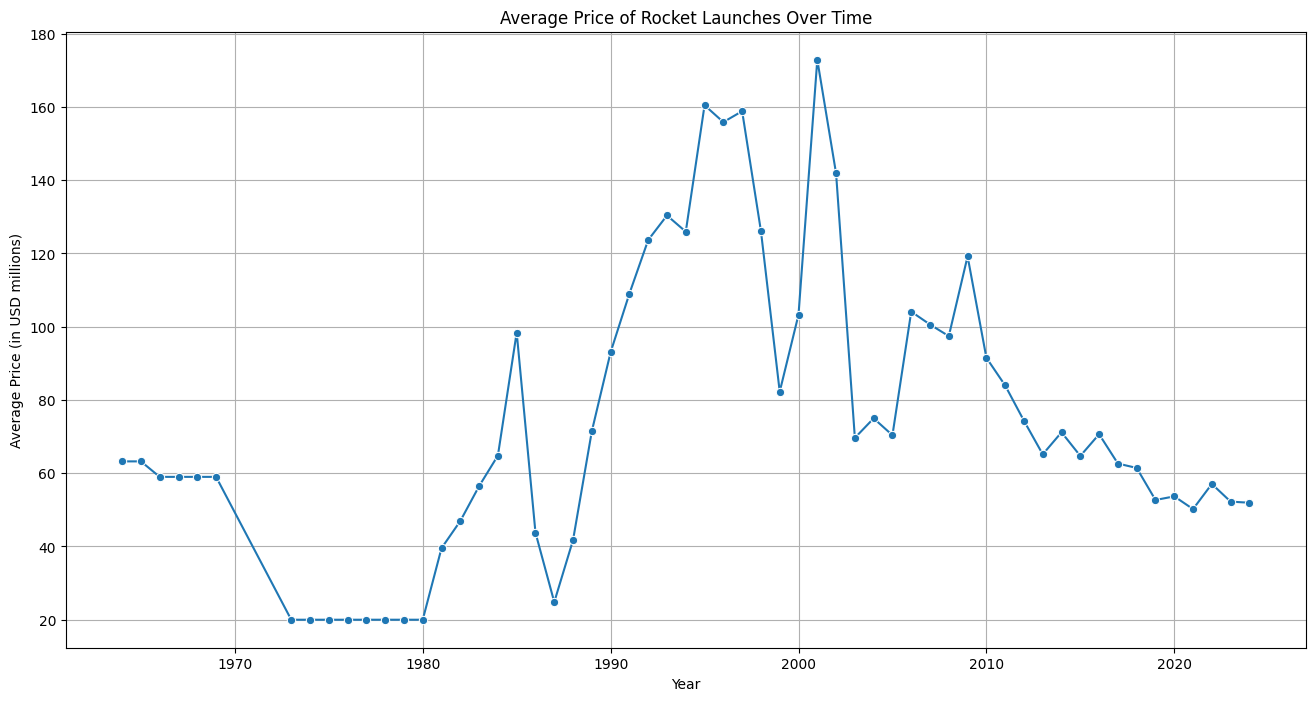

In [63]:
# Plot the average price per year
plt.figure(figsize=(16, 8))
sns.lineplot(data=avg_price_per_year, x="Year", y="Price", marker="o")
plt.title("Average Price of Rocket Launches Over Time")
plt.xlabel("Year")
plt.ylabel("Average Price (in USD millions)")
plt.grid(True)
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?


In [65]:
# Identify the top 10 organizations by the total number of launches
top_10_orgs = df_data["Organisation"].value_counts().head(10).index

# Filter the dataframe to include only the top 10 organizations
df_top_10_orgs = df_data[df_data["Organisation"].isin(top_10_orgs)]

# Group by 'Year' and 'Organisation' and count the number of launches
launches_per_year_org = (
    df_top_10_orgs.groupby(["Year", "Organisation"])
    .size()
    .reset_index(name="Number of Launches")
)
launches_per_year_org.sort_values(by="Number of Launches", ascending=False)

,Year,Organisation,Number of Launches
106,1982,RVSN USSR,108
84,1977,RVSN USSR,102
111,1983,RVSN USSR,101
123,1985,RVSN USSR,101
101,1981,RVSN USSR,100
...,...,...,...
170,1993,US Air Force,1
166,1993,CASC,1
143,1989,General Dynamics,1
151,1990,US Air Force,1


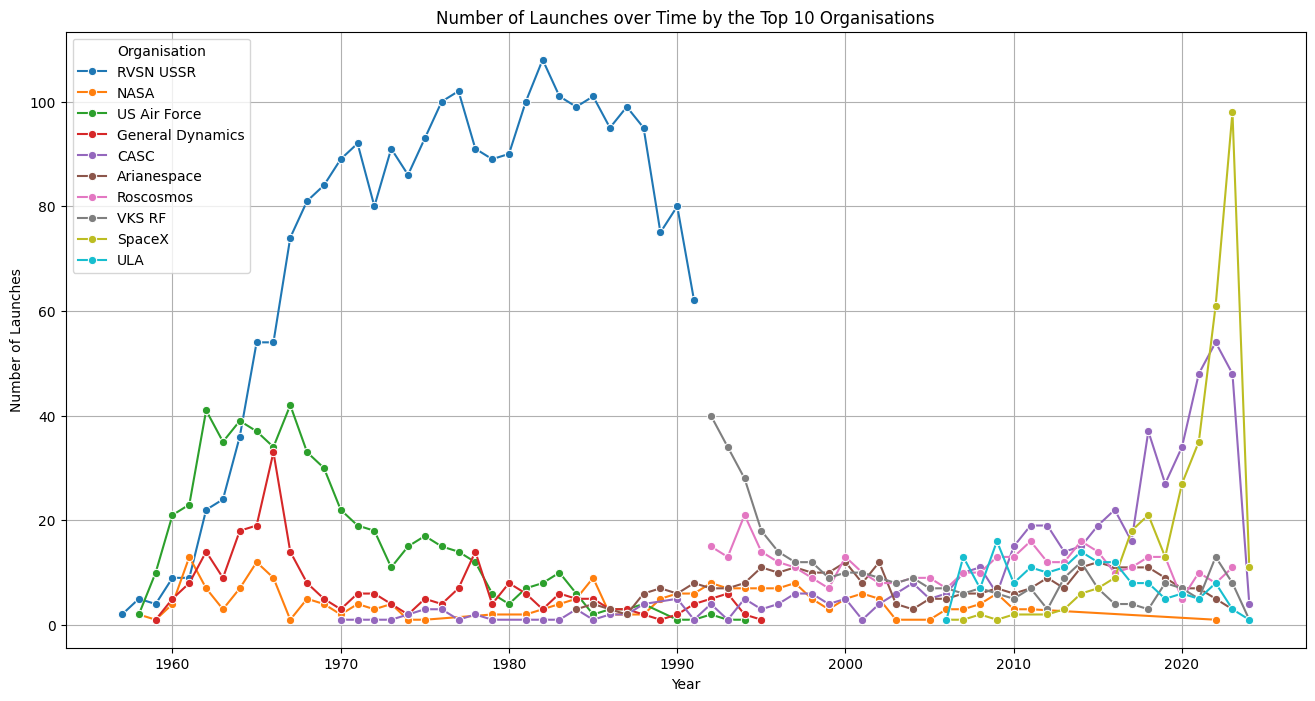

In [66]:
# Plot the number of launches over time by the top 10 organizations
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=launches_per_year_org,
    x="Year",
    y="Number of Launches",
    hue="Organisation",
    marker="o",
)
plt.title("Number of Launches over Time by the Top 10 Organisations")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.legend(title="Organisation")
plt.grid(True)
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.


In [67]:
# Filter the dataframe to include only the years up to 1991
df_cold_war = df_data[df_data["Year"] <= 1991]

# Filter the dataframe to include only the USA and USSR (including Kazakhstan as part of USSR)
df_cold_war = df_cold_war[
    df_cold_war["launch_country"].isin(["USA", "Russian Federation", "Kazakhstan"])
]

# Group by 'Year' and 'launch_country' and count the number of launches
launches_cold_war = (
    df_cold_war.groupby(["Year", "launch_country"])
    .size()
    .reset_index(name="Number of Launches")
)

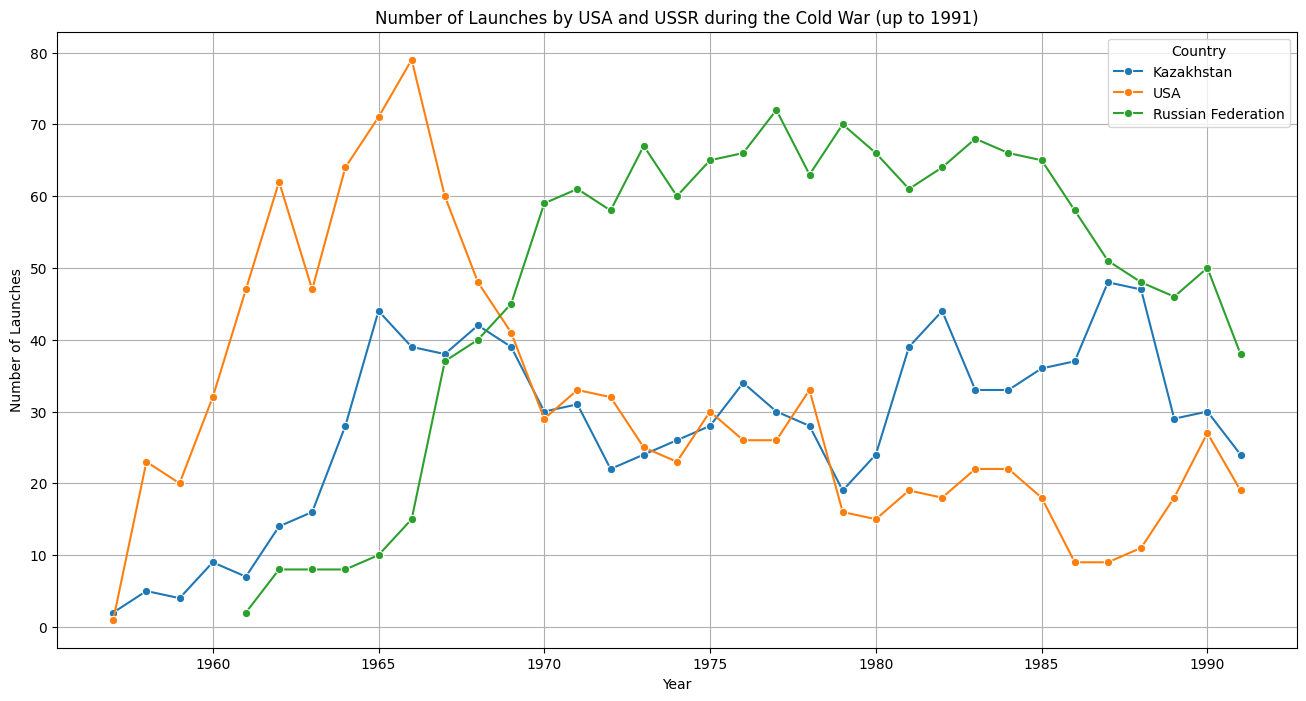

In [68]:
# Plot the number of launches over time by the USA and USSR
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=launches_cold_war,
    x="Year",
    y="Number of Launches",
    hue="launch_country",
    marker="o",
)
plt.title("Number of Launches by USA and USSR during the Cold War (up to 1991)")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.legend(title="Country")
plt.grid(True)
plt.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.


In [69]:
# Filter the dataframe to include only the USA and USSR (including Kazakhstan as part of USSR)
df_ussr_usa = df_data[
    df_data["launch_country"].isin(["USA", "Russian Federation", "Kazakhstan"])
]

# Group by 'launch_country' and count the number of launches
launches_ussr_usa = df_ussr_usa["launch_country"].value_counts().reset_index()
launches_ussr_usa.columns = ["launch_country", "Number of Launches"]

# Combine the counts for Russian Federation and Kazakhstan as USSR
launches_ussr_usa.loc[
    launches_ussr_usa["launch_country"].isin(["Russian Federation", "Kazakhstan"]),
    "launch_country",
] = "USSR"
launches_ussr_usa = launches_ussr_usa.groupby("launch_country").sum().reset_index()

In [81]:
# Create the pie chart
fig = px.pie(
    launches_ussr_usa,
    names="launch_country",
    values="Number of Launches",
    title="Total Number of Launches: USSR vs USA",
    color_discrete_sequence=px.colors.sequential.Rainbow,
)

fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers


In [83]:
# Filter the dataframe to include only the USA and USSR (including Kazakhstan as part of USSR)
df_superpowers = df_data[
    df_data["launch_country"].isin(["USA", "Russian Federation", "Kazakhstan"])
]

# Group by 'Year' and 'launch_country' and count the number of launches
launches_superpowers = (
    df_superpowers.groupby(["Year", "launch_country"])
    .size()
    .reset_index(name="Number of Launches")
)

# Combine the counts for Russian Federation and Kazakhstan as USSR
launches_superpowers.loc[
    launches_superpowers["launch_country"].isin(["Russian Federation", "Kazakhstan"]),
    "launch_country",
] = "USSR"
launches_superpowers = (
    launches_superpowers.groupby(["Year", "launch_country"]).sum().reset_index()
)

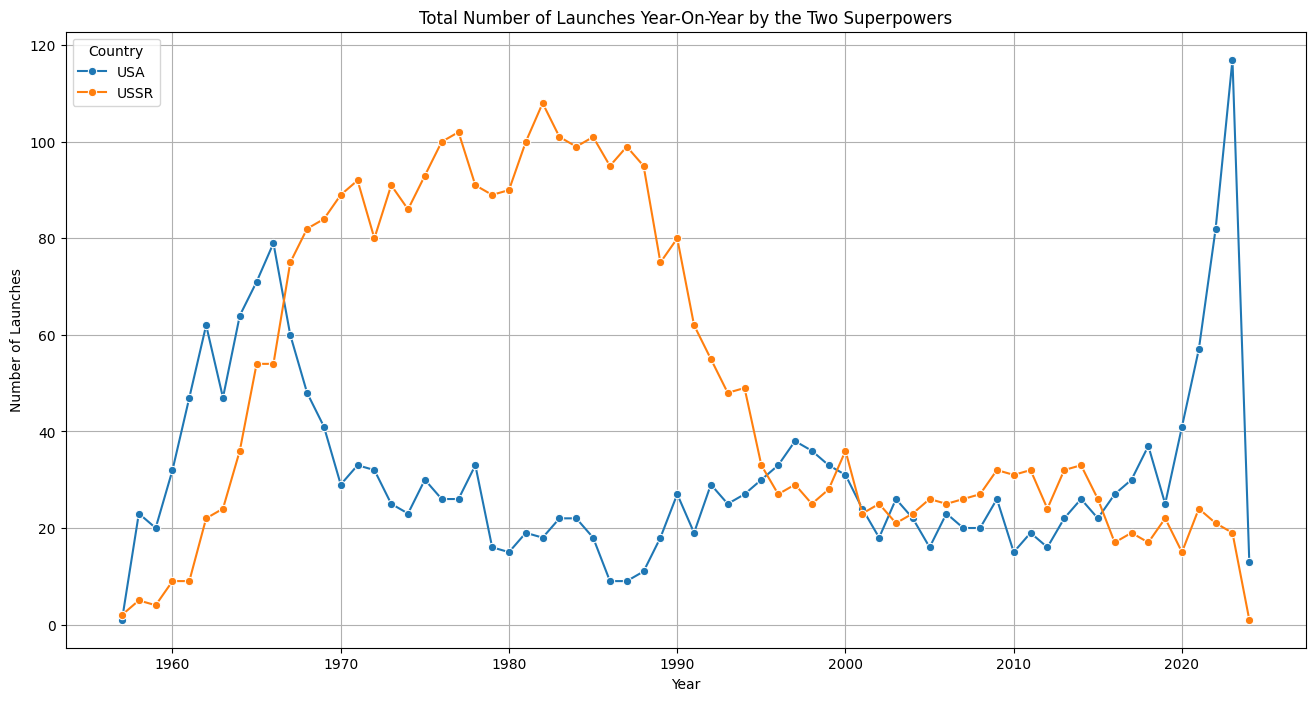

In [84]:
# Plot the number of launches year-on-year by the two superpowers
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=launches_superpowers,
    x="Year",
    y="Number of Launches",
    hue="launch_country",
    marker="o",
)
plt.title("Total Number of Launches Year-On-Year by the Two Superpowers")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.legend(title="Country")
plt.grid(True)
plt.show()

## Chart the Total Number of Mission Failures Year on Year.


In [85]:
# Filter the dataframe to include only failed missions
df_failures_yearly = df_data[df_data["Mission_status"] == "Failure"]

# Group by 'Year' and count the number of failures
failures_per_year = (
    df_failures_yearly.groupby("Year").size().reset_index(name="Number of Failures")
)

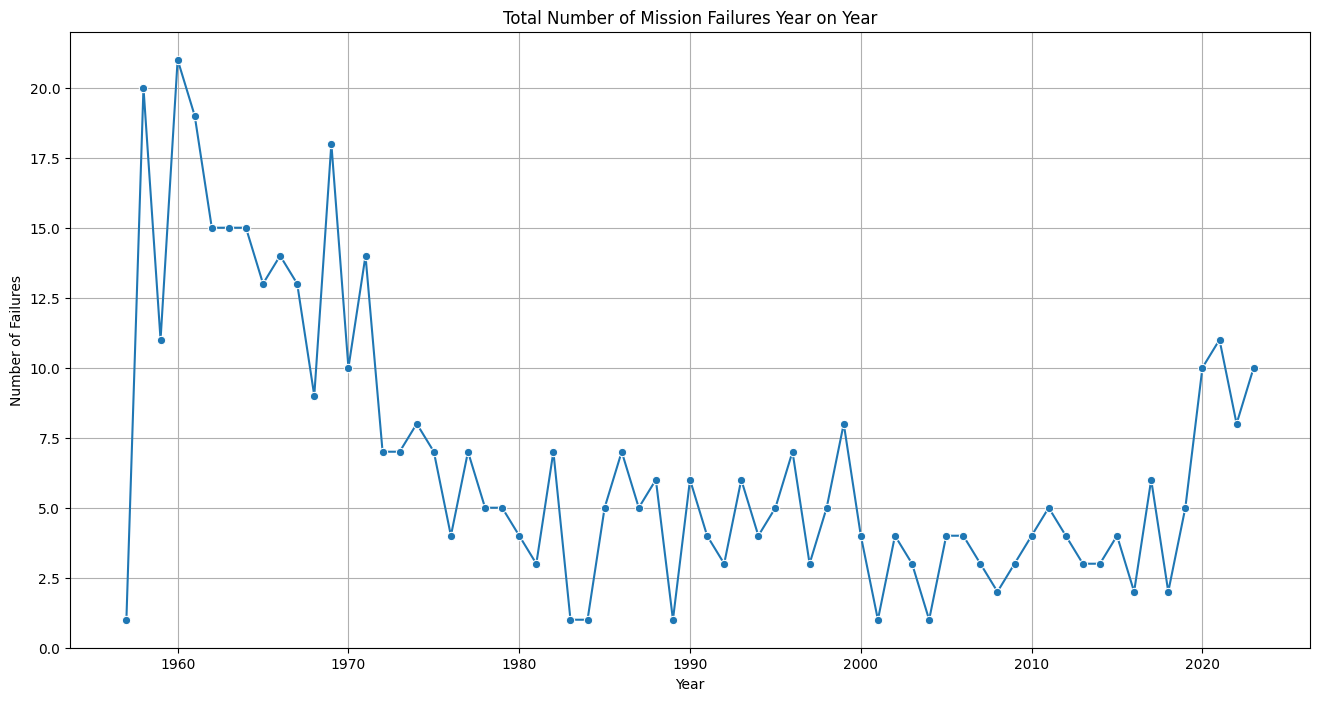

In [86]:
# Plot the number of mission failures per year
plt.figure(figsize=(16, 8))
sns.lineplot(data=failures_per_year, x="Year", y="Number of Failures", marker="o")
plt.title("Total Number of Mission Failures Year on Year")
plt.xlabel("Year")
plt.ylabel("Number of Failures")
plt.grid(True)
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?


In [87]:
# Calculate the total number of launches per year
total_launches_per_year = (
    df_data.groupby("Year").size().reset_index(name="Total Launches")
)

# Calculate the number of failures per year
failures_per_year = (
    df_data[df_data["Mission_status"] == "Failure"]
    .groupby("Year")
    .size()
    .reset_index(name="Number of Failures")
)

# Merge the two dataframes on 'Year'
failures_percentage_per_year = pd.merge(
    total_launches_per_year, failures_per_year, on="Year", how="left"
)

# Calculate the percentage of failures
failures_percentage_per_year["Failure Percentage"] = (
    failures_percentage_per_year["Number of Failures"]
    / failures_percentage_per_year["Total Launches"]
) * 100

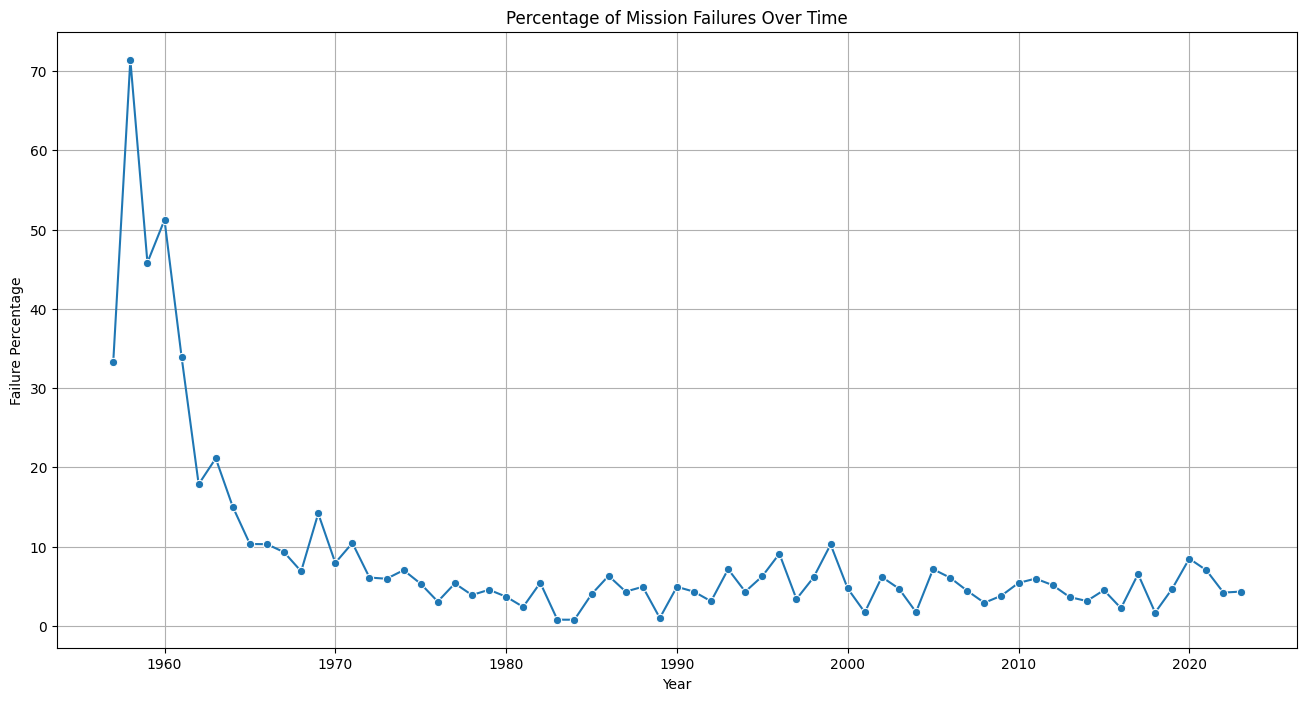

In [88]:
# Plot the percentage of failures over time
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=failures_percentage_per_year, x="Year", y="Failure Percentage", marker="o"
)
plt.title("Percentage of Mission Failures Over Time")
plt.xlabel("Year")
plt.ylabel("Failure Percentage")
plt.grid(True)
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?


In [90]:
# Group by 'Year' and 'launch_country' and count the number of launches
total_launches_per_year_country = (
    df_data.groupby(["Year", "launch_country"])
    .size()
    .reset_index(name="Total Launches")
)

# Find the country with the maximum launches each year
leading_country_per_year = total_launches_per_year_country.loc[
    total_launches_per_year_country.groupby("Year")["Total Launches"].idxmax()
]

# Display the result
print("Leading country per year based on total launches:")
print(leading_country_per_year)

# Filter the dataframe to include only successful missions
df_successful = df_data[df_data["Mission_status"] == "Success"]

# Group by 'Year' and 'launch_country' and count the number of successful launches
successful_launches_per_year_country = (
    df_successful.groupby(["Year", "launch_country"])
    .size()
    .reset_index(name="Successful Launches")
)

# Find the country with the maximum successful launches each year
leading_country_per_year_successful = successful_launches_per_year_country.loc[
    successful_launches_per_year_country.groupby("Year")["Successful Launches"].idxmax()
]

# Display the result
print("\nLeading country per year based on successful launches:")
print(leading_country_per_year_successful)

Leading country per year based on total launches:
     Year launch_country  Total Launches
0    1957     Kazakhstan               2
3    1958            USA              23
5    1959            USA              20
7    1960            USA              32
10   1961            USA              47
..    ...            ...             ...
416  2020            USA              41
426  2021            USA              57
436  2022            USA              82
448  2023            USA             117
456  2024            USA              13

[68 rows x 3 columns]

Leading country per year based on successful launches:
     Year launch_country  Successful Launches
0    1957     Kazakhstan                    2
2    1958            USA                    5
4    1959            USA                    8
6    1960            USA                   17
8    1961            USA                   29
..    ...            ...                  ...
376  2020            USA                   36
377  2021  

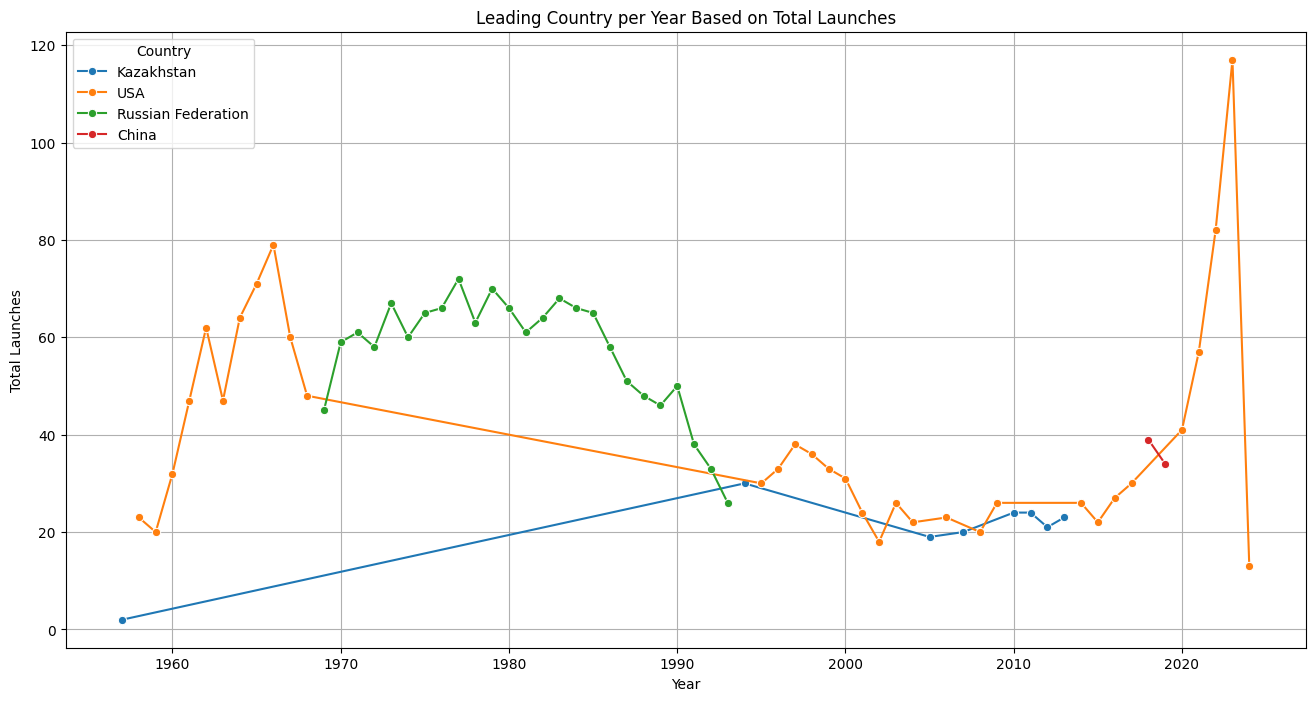

In [91]:
# Plot the leading country per year based on total launches
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=leading_country_per_year,
    x="Year",
    y="Total Launches",
    hue="launch_country",
    marker="o",
)
plt.title("Leading Country per Year Based on Total Launches")
plt.xlabel("Year")
plt.ylabel("Total Launches")
plt.legend(title="Country")
plt.grid(True)
plt.show()

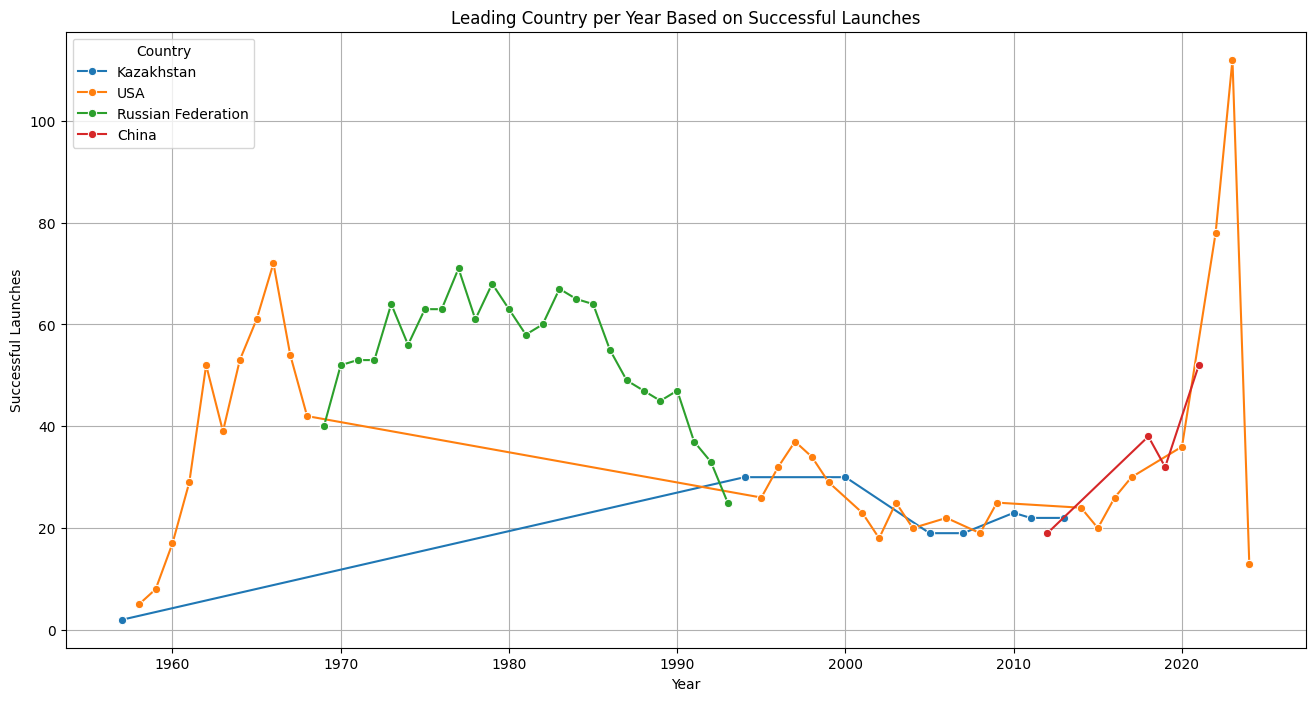

In [92]:
# Plot the leading country per year based on successful launches
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=leading_country_per_year_successful,
    x="Year",
    y="Successful Launches",
    hue="launch_country",
    marker="o",
)
plt.title("Leading Country per Year Based on Successful Launches")
plt.xlabel("Year")
plt.ylabel("Successful Launches")
plt.legend(title="Country")
plt.grid(True)
plt.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?


In [93]:
# Group by 'Year' and 'Organisation' and count the number of launches
launches_per_year_org = (
    df_data.groupby(["Year", "Organisation"])
    .size()
    .reset_index(name="Number of Launches")
)

# Find the organisation with the maximum launches each year
leading_org_per_year = launches_per_year_org.loc[
    launches_per_year_org.groupby("Year")["Number of Launches"].idxmax()
]

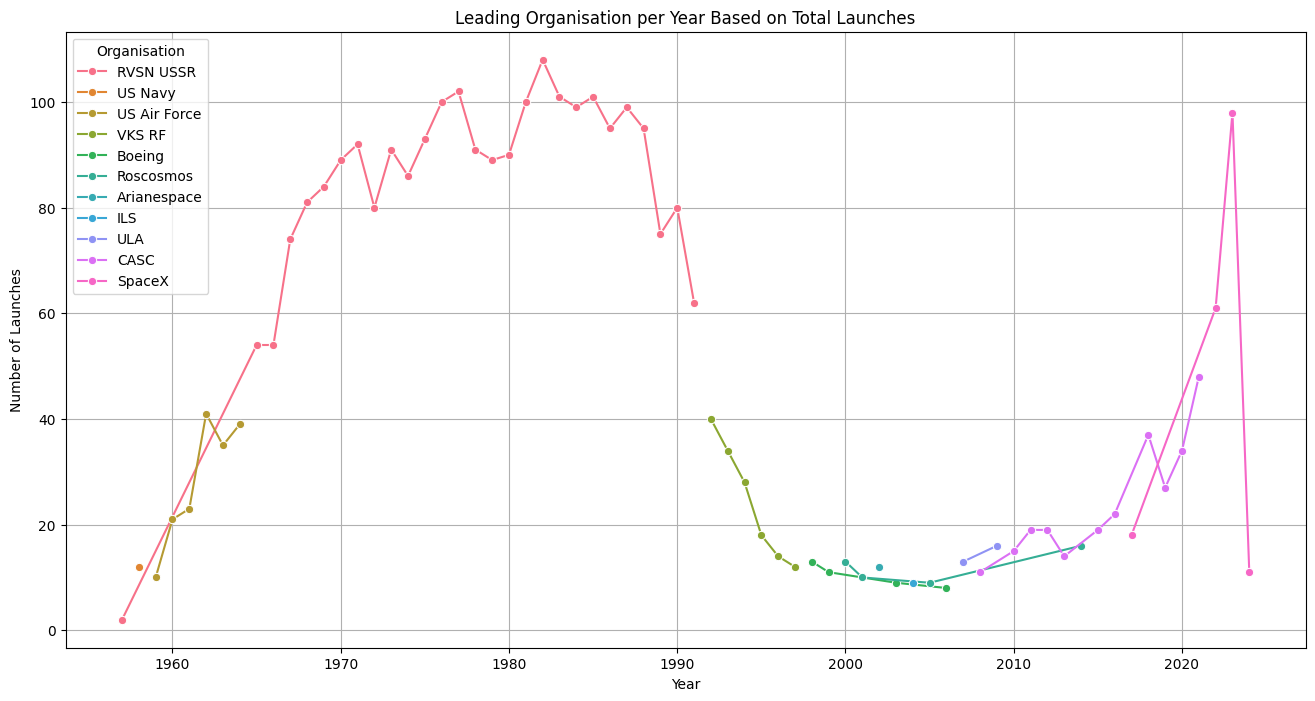

In [94]:
# Plot the leading organisation per year based on total launches
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=leading_org_per_year,
    x="Year",
    y="Number of Launches",
    hue="Organisation",
    marker="o",
)
plt.title("Leading Organisation per Year Based on Total Launches")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.legend(title="Organisation")
plt.grid(True)
plt.show()

In [95]:
# Display the leading organisations in the 1970s, 1980s, 2018, 2019, and 2020
dominant_orgs = leading_org_per_year[
    leading_org_per_year["Year"].isin(range(1970, 1990))
    | leading_org_per_year["Year"].isin([2018, 2019, 2020])
]
print("Dominant organisations in the 1970s, 1980s, 2018, 2019, and 2020:")
print(dominant_orgs)

Dominant organisations in the 1970s, 1980s, 2018, 2019, and 2020:
     Year Organisation  Number of Launches
81   1970    RVSN USSR                  89
93   1971    RVSN USSR                  92
101  1972    RVSN USSR                  80
108  1973    RVSN USSR                  91
116  1974    RVSN USSR                  86
126  1975    RVSN USSR                  93
133  1976    RVSN USSR                 100
140  1977    RVSN USSR                 102
147  1978    RVSN USSR                  91
157  1979    RVSN USSR                  89
165  1980    RVSN USSR                  90
175  1981    RVSN USSR                 100
183  1982    RVSN USSR                 108
193  1983    RVSN USSR                 101
203  1984    RVSN USSR                  99
211  1985    RVSN USSR                 101
219  1986    RVSN USSR                  95
228  1987    RVSN USSR                  99
240  1988    RVSN USSR                  95
250  1989    RVSN USSR                  75
672  2018         CASC         